<a href="https://colab.research.google.com/github/ale-bomei/Laboratorio/blob/main/Laboratorio_Esperimento_1_accelereazione_di_gravit%C3%A0_e_pendolo_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate
import scipy as scipy
import pandas as pd
from scipy.stats import norm, chisquare, ncx2,chi2
import scipy.stats as stats
from IPython.display import display, HTML, Latex

## **FUNCTIONS**


In [2]:
def media(x):
    m = 0
    for i in x:
        m += i
    m /= len(x)
    mf = np.floor(1000.*m)/1000
    return mf

def deviazione_standard (x):
    ds = 0
    m = media(x)
    for i in x:
        ds += ((i - m)*(i - m))
    ds /= (len(x)-1)
    ds = np.sqrt(ds)
    dsf = np.floor(1000.*ds)/1000
    return dsf

def ds_media (x):
  dsm = deviazione_standard(x) / np.sqrt(len(x))
  dsmf = np.floor(1000.*dsm)/1000
  return dsmf

def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

def Tabella(x, nome_lista):
  misurazioni_ordinate = sorted(x)
  valori, frequenze = np.unique(misurazioni_ordinate, return_counts=True)
  frequenze_normalizzate = frequenze / len(x)
  frequenze_normalizzate_adjusted = np.floor(1000.*frequenze_normalizzate)/1000
  tabella = []
  for i, (valore, frequenza, frequenza_normalizzata) in enumerate(zip(valori, frequenze, frequenze_normalizzate_adjusted), start=1):
    tabella.append([i, f"{valore:.2f}", frequenza, frequenza_normalizzata])
  intestazioni = ["k",  nome_lista, 'n{}'.format(get_sub('k')), 'F{}'.format(get_sub('k'))]
  table = tabulate(tabella, intestazioni, tablefmt="pretty")
  return table

def gaus(x,m,s):
    h = 1./s/np.sqrt(2)
    z = x-m
    return np.exp(-np.power(h*z, 2.)) *h / np.sqrt(np.pi)

def Interpolazione(x,y,sy):
    if len(x) != len(y) or len(x) == 0:
        print('I dati inseriti non sono validi')
        return 0
    if sy ==0 :
        print("L'incertezza non può essere 0")
        return 0
    sumy = 0
    sumx = 0
    sumxy = 0
    sumx2 = 0
    for i in range(len(x)):
        sumy += y[i]
        sumx += x[i]
        sumxy += x[i]*y[i]
        sumx2 += x[i]*x[i]
    D = ((len(x))*sumx2 - ((sumx)*(sumx)))
    A = (sumy*sumx2 - sumx*sumxy) / D
    B = (len(x)*sumxy - sumx*sumy) / D
    sa = sy*np.sqrt(sumx2 / D )
    sb = sy*np.sqrt(len(x)/ D )
    sab = (sumx / D) * sy
    return (A,sa, B,sb, sab)

def Interpolazioneorigine(x,y,sy):
    if len(x) != len(y) or len(x) == 0:
        print('I dati inseriti non sono validi')
        return 0
    if sy ==0 :
        print("L'incertezza non può essere 0")
        return 0
    sumxy = 0
    sumx2 = 0
    for i in range(len(x)):
        sumxy += x[i]*y[i]
        sumx2 += x[i]*x[i]
    k = sumxy/sumx2
    sk = sy/np.sqrt(sumx2)
    return (k,sk)

def Interpolazionesyi(x,y,sy):
    if len(x) != len(y) or len(x) !=   len(sy) or len(x) == 0:
        print('I dati inseriti non sono validi')
        return 0
    if sy ==0 :
        print("L'incertezza non può essere 0")
        return 0
    sumy = 0
    sumx = 0
    sumxy = 0
    sumx2 = 0
    sumsy = 0
    for i in range(len(x)):
        sumy += y[i] / (sy[i]*sy[i])
        sumx += x[i] / (sy[i]*sy[i])
        sumxy += (x[i]*y[i]) / (sy[i]*sy[i])
        sumx2 += (x[i]*x[i]) / (sy[i]*sy[i])
        sumsy += 1 / (sy[i]*sy[i])
    D2 = (sumsy*sumx2 - ((sumx)*(sumx)))
    A = (sumy*sumx2 - sumx*sumxy) / D2
    B = (sumsy*sumxy - sumx*sumy) / D2
    sa = np.sqrt(sumx2 / D2 )
    sb = np.sqrt(sumsy/ D2 )
    sab = (sumx / D2)
    return (A,sa, B,sb,sab)

def correlazione_lineare(sa,sb,sab):
  r = sab / (sa*sb)
  return r

def Estrapolazione(A, B, sa, sb, sab, x):
  y = A + B*x
  sy = np.sqrt(sa*sa + x*x*sb*sb + 2*x*sab)
  return(y,sy)

## **DATA**

In [3]:
T = np.array([0.78,0.75,0.73,0.83,0.84,0.88,0.80,0.94,0.89,0.86,0.84,0.83,0.80,
0.83,0.87,0.66,0.73,0.74,0.82,0.73,0.71,0.91,0.76,0.69,0.63,0.72,0.80,
0.81,0.76,0.80,0.72,0.80,0.79,0.78,0.84,0.82,0.82,0.76,0.81,0.84,0.85,
0.88,0.81,0.83,0.83,0.82,0.86,0.90,0.84,0.87,0.87,0.84,0.91,0.79,0.93,
0.93,0.93,0.87,0.81,0.88,0.90,0.89,0.90,0.89,0.91,0.86,0.87,0.96,0.86,
0.96,0.86,0.94,0.86,0.90,0.83,0.79,0.81,0.86,0.86,0.84,0.87,0.94,0.90,
0.84,0.91,0.90,0.88,0.93,0.84,0.87,0.86,0.81,0.88,0.91,0.86,0.86,0.88,
     0.84,0.67,0.83])
#Misure del periodo del pendolo (da soli)

T20 = np.array([9.22,9.41,9.41,9.53,9.22,9.35,9.39,9.62,9.54,9.30])
T43 = np.array([13.25, 13.17, 13.24, 13.17, 13.24, 13.18, 13.26, 13.19, 13.24])
T53 = np.array([14.61, 14.64, 14.59, 14.67, 14.66, 14.74, 14.57, 14.65, 14.58, 14.62])
T70 = np.array([16.94, 16.94, 16.85, 16.89])
T685 = np.array([16.79, 16.76, 16.83, 16.73, 16.81, 16.77, 16.86, 16.80, 16.68, 16.81])
T86 = np.array([18.69, 18.73, 18.64, 18.69, 18.59,18.50, 18.78, 18.62, 18.69, 18.57 ])
T109 = np.array([20.75, 20.61, 20.99, 20.80, 20.97, 20.96, 20.95, 20.78, 21.00, 20.87])
#Misure ΔT (10 oscillazioni)

T_interpol_media = [media(T20) / 10, media(T43) / 10, media(T53) / 10 , media(T685) / 10,  media(T86)/10, media(T109)/10]
T_interpol_ds = [deviazione_standard(T20) / 10, deviazione_standard(T43) / 10, deviazione_standard(T53) / 10 , deviazione_standard(T685) / 10,  deviazione_standard(T86)/10, deviazione_standard(T109)/10 ]
T_interpol_ds_media = [ds_media(T20) / 10, ds_media(T43) / 10, ds_media(T53) / 10 , ds_media(T685) / 10,  ds_media(T86)/10, ds_media(T109)/10 ]
T_interpol_media2 = [(media(T20) / 10)**2, (media(T43) / 10)**2, (media(T53) / 10)**2 , (media(T685) / 10)**2,  (media(T86)/10)**2, (media(T109)/10)**2 ]
T_media_log = [np.log(media(T20) / 10), np.log(media(T43) / 10), np.log(media(T53) / 10) ,np.log(media(T685) / 10),  np.log(media(T86)/10), np.log(media(T109)/10) ]

L = [0.20, 0.43, 0.53, 0.685, 0.8625, 1.09 ] #m
L_log = np.log(L)
L_sqrt = np.array([np.sqrt(0.20), np.sqrt(0.43), np.sqrt(0.53), np.sqrt(0.685), np.sqrt(0.8625), np.sqrt(1.09)])

print("Questi sono i dati per il periodo del pendolo (da soli): \n"
      "Media: " + str(media(T)) + "\n"
      "Deviazione standard: " + str(deviazione_standard(T)) + "\n"
      "Deviazione standard della media: " + str(ds_media(T)) + "\n"
      "Numero di prove: " + str(len(T)) + "\n")
print (Tabella(T, "T[s]"))
print("\n")

RT = np.array([0.66, 0.71, 0.61, 0.64, 0.65, 0.67, 0.60, 0.60, 0.64, 0.67, 0.60,
      0.67, 0.62, 0.64, 0.58, 0.65, 0.69, 0.66, 0.68, 0.61, 0.66, 0.53,
      0.71, 0.68,0.67, 0.68, 0.63])
#Misure del periodo del pendolo (in due)

print("Questi sono i dati per il periodo del pendolo (in due): \n"
      "Media: " + str(media(RT)) + "\n"
      "Deviazione standard: " + str(deviazione_standard(RT)) + "\n"
      "Deviazione standard della media: " + str(ds_media(RT)) + "\n"
      "Numero di prove: " + str(len(RT)) + "\n")
print (Tabella(RT,"RT[s]"))
print("\n")

print("Questi sono i dati per il periodo del pendolo misurando DT di 10 oscillazioni(considerando T = DT/10): \n"
      "Media: " + str(media(np.array(T20)/10.0)) + "\n"
      "Deviazione standard: " + str(deviazione_standard(np.array(T20))/10.0) + "\n"
      "Deviazione standard della media: " + str(ds_media(np.array(T20)/10.0)) + "\n"
      "Numero di prove: " + str(len(T20)) + "\n")
print (Tabella(T20, '\u0394' 'T[s]'))
print("\n")

m = np.array([50.43,50.45,50.43,50.42,50.43,50.42,50.43,50.42,50.41,50.41])
#Massa pendolo

print("Questi sono i dati per la massa del pendolo: \n"
      "Media: " + str(media(m)) + "\n"
      "Deviazione standard: " + str(deviazione_standard(m)) + "\n"
      "Deviazione standard della media: " + str(ds_media(m)) + "\n"
      "Numero di prove: " + str(len(m)) + "\n")

print (Tabella(m, "m[g]"))
print("\n")

Diametro = 0.020 #m
Sigma_Diametro = 0.001 #m

print('Il diametro misura 2 ± 0.1 cm' "\n")

'''
Oscillazioni = {100: 93.67, 200: 188.43, 300: 281.72, 400: 374.92, 500: 467.25}
#Numero oscillazioni e tempo impiegato
'''



Questi sono i dati per il periodo del pendolo (da soli): 
Media: 0.838
Deviazione standard: 0.066
Deviazione standard della media: 0.006
Numero di prove: 100

+----+------+----+------+
| k  | T[s] | nₖ |  Fₖ  |
+----+------+----+------+
| 1  | 0.63 | 1  | 0.01 |
| 2  | 0.66 | 1  | 0.01 |
| 3  | 0.67 | 1  | 0.01 |
| 4  | 0.69 | 1  | 0.01 |
| 5  | 0.71 | 1  | 0.01 |
| 6  | 0.72 | 2  | 0.02 |
| 7  | 0.73 | 3  | 0.03 |
| 8  | 0.74 | 1  | 0.01 |
| 9  | 0.75 | 1  | 0.01 |
| 10 | 0.76 | 3  | 0.03 |
| 11 | 0.78 | 2  | 0.02 |
| 12 | 0.79 | 3  | 0.03 |
| 13 | 0.80 | 5  | 0.05 |
| 14 | 0.81 | 6  | 0.06 |
| 15 | 0.82 | 4  | 0.04 |
| 16 | 0.83 | 7  | 0.07 |
| 17 | 0.84 | 10 | 0.1  |
| 18 | 0.85 | 1  | 0.01 |
| 19 | 0.86 | 11 | 0.11 |
| 20 | 0.87 | 7  | 0.07 |
| 21 | 0.88 | 6  | 0.06 |
| 22 | 0.89 | 3  | 0.03 |
| 23 | 0.90 | 6  | 0.06 |
| 24 | 0.91 | 5  | 0.05 |
| 25 | 0.93 | 4  | 0.04 |
| 26 | 0.94 | 3  | 0.03 |
| 27 | 0.96 | 2  | 0.02 |
+----+------+----+------+


Questi sono i dati per il periodo

'\nOscillazioni = {100: 93.67, 200: 188.43, 300: 281.72, 400: 374.92, 500: 467.25}\n#Numero oscillazioni e tempo impiegato\n'

In [55]:
#Tabella 1
lunghezza = np.array([0.20, 0.43, 0.53, 0.685, 0.86, 1.09])

data = {
    'l(m)': lunghezza,
    'ΔT (s)': [T20, T43, T53, T685, T86, T109]
}

data['ΔT (s)'] = [f"{arr.mean():.3f} ± {arr.std():.3f}" for arr in data['ΔT (s)']]
data['T (s)'] = [f"{arr.mean()/10:.3f} ± {arr.std()/10:.3f}" for arr in [T20, T43, T53, T685, T86, T109]]
df = pd.DataFrame(data)
display(HTML(df.to_html(escape=False)))

,l(m),ΔT (s),T (s)
0,0.200,9.399 ± 0.127,0.940 ± 0.013
1,0.430,13.216 ± 0.035,1.322 ± 0.003
2,0.530,14.633 ± 0.048,1.463 ± 0.005
3,0.685,16.784 ± 0.049,1.678 ± 0.005
4,0.860,18.650 ± 0.078,1.865 ± 0.008
5,1.090,20.868 ± 0.123,2.087 ± 0.012


## **ISTOGRAMMA**

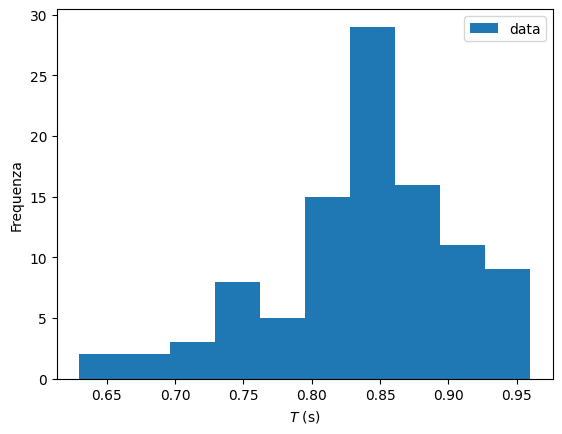

In [5]:
plt.hist(T,bins=10, range = [min(T), max(T)], label='data')
plt.xlabel('$T$ (s)')
plt.ylabel('Frequenza')
plt.legend()

## **GAUSSIANA**

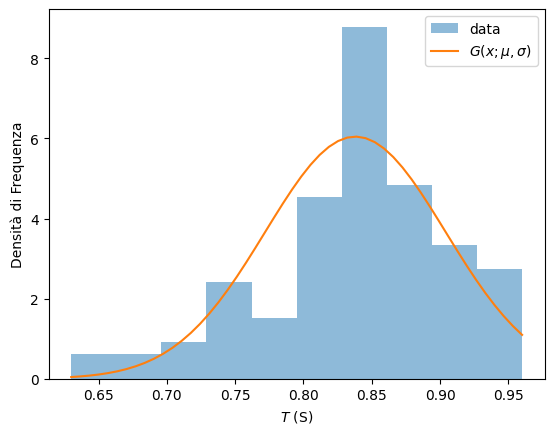

In [6]:
# Definisco il numero degli intervalli, minimo, massimo e disegno l'istogramma
num_bins = 10
Tmin, Tmax = min(T), max(T) # scelgo minimo e massimo arrotondando (oss: floor e ceil restituiscono un intero, io voglio arrotondare a 0.1, da cui la moltiplicazione e divisione per 10)
plt.hist(T, num_bins, range = [Tmin, Tmax], alpha=0.5, density=True, label='data') # density=True richiede che l'area dell'istogramma venga normalizzata a 1 ; alpha = 0.5 rende il colore dell'area dell'istogramma sfumato; label = 'data' fornisce un nome all'oggetto disegnato per la legenda

# Abbellimento del grafico
xt = [round(0.65+i*0.05, 2) for i in range(num_bins+1)] # abbellimento del grafico: scelgo i punti dove disegnare gli intervalli
plt.xticks(xt, [f'{i:.2f}' for i in xt]) # scrivo le tacchette sull'asse x
plt.xlabel('$T$ (S)') # titolo asse x - il testo compreso tra i segni $ viene interpretato come linguaggio LaTeX di tipo matematico (https://en.wikibooks.org/wiki/LaTeX/Mathematics)
plt.ylabel('Densità di Frequenza') # titolo asse y

# Disegno la funzione
mean, sigma = np.mean(T),deviazione_standard(T) # calcolo media e deviazione standard
t = np.linspace(Tmin,Tmax) # questa funzione definisce un vettore ad alta densità per calcolare la funzione da disegnare lungo l'asse x
plt.plot(t,gaus(t,mean, sigma),label=r"$G(x;\mu,\sigma)$")
plt.legend() # aggiungo una legenda



## **TEST DEL CHI QUADRO**

In [39]:
from scipy import integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare, ncx2,chi2


def chisq(y,e):
    '''
    y: vettore delle misure
    e: vettore dei valori attesi per i valori di x considerati
    sy: incertezza sulle misure
    '''
    if len(y)!=len(e) or len(y) == 0:
        print('I dati inseriti non sono validi')
        return 0
    c2 = 0
    for i in range(len(y)): c2 = c2 + (((y[i]-e[i])*(y[i]-e[i])) / e[i])
    return c2

Elementi_per_intervallo = np.array([2, 2, 3, 8, 5, 15, 29, 16, 11, 9])
Edges = np.array([0.63 , 0.663, 0.696, 0.729, 0.762, 0.795, 0.828, 0.861, 0.894,
        0.927, 0.96])

def gaus(x,m,s):
    h = 1./s/np.sqrt(2)
    z = x-m
    return np.exp(-np.power(h*z, 2.)) *h / np.sqrt(np.pi)

def gaussian(x): return gaus(x, media(T), deviazione_standard(T))
Ek1, error1 = quad(gaussian, -np.inf, 0.663)
Ek2, error2 = quad(gaussian, 0.663, 0.696)
Ek3, error3 = quad(gaussian, 0.696, 0.729)
Ek4, error4 = quad(gaussian, 0.729, 0.762)
Ek5, error6 = quad(gaussian,  0.762, 0.795)
Ek6, error6 = quad(gaussian, 0.795, 0.828)
Ek7, error7 = quad(gaussian, 0.828, 0.861)
Ek8, error8 = quad(gaussian, 0.861, 0.894)
Ek9, error9 = quad(gaussian, 0.894,  0.927)
Ek10, error10 = quad(gaussian, 0.927, np.inf)

pk = np.array([Ek1, Ek2, Ek3, Ek4, Ek5, Ek6, Ek7, Ek8, Ek9, Ek10])
Ek = pk*len(T)
print(Ek)
print(Elementi_per_intervallo)


chi2v = chisq(Elementi_per_intervallo, Ek)
print('chi2 = {:.2f}'.format(chi2v))

d = len(Elementi_per_intervallo)-3 #media, deviazione_standard, Ek
chi2_ridotto = chi2v / d
print('chi2_ridotto {}'.format(chi2_ridotto))


pchi2 = 1-chi2.cdf(chi2v,d)
print('P(chi2) = {:.1f}%'.format(100.*pchi2))


[ 0.40065759  1.17112047  3.35989342  7.5443468  13.2596817  18.242768
 19.64772748 16.56540418 10.93327584  8.87512451]
[ 2  2  3  8  5 15 29 16 11  9]
chi2 = 17.23
chi2_ridotto 2.4616584299385553
P(chi2) = 1.6%


## **GRAFICI**

,L[cm],T[s]
0,0.2000,0.9399
1,0.4300,1.3215
2,0.5300,1.4633
3,0.6850,1.6784
4,0.8625,1.8650
5,1.0900,2.0868


Text(-0.17800000000000005, 2.1001999999999996, 'T (s)')

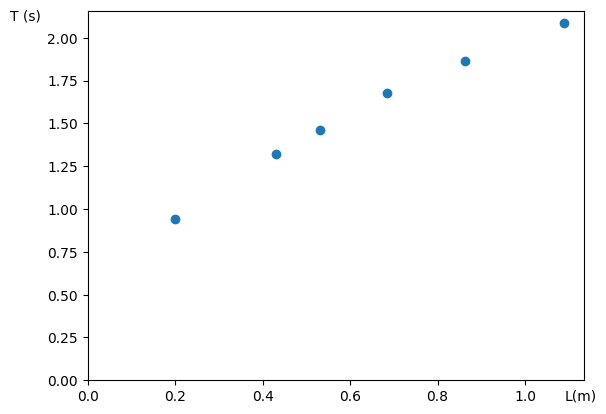

In [8]:
#T su L
# Creare un DataFrame con pandas
data = {'L[cm]': L, 'T[s]': (T_interpol_media)}
df = pd.DataFrame(data)
display(HTML(df.to_html(escape=False)))

print("\n")

# Disegno il grafico con barre di errore
plt.errorbar(L,T_interpol_media, yerr=T_interpol_ds, fmt='o', ls='none', label='data')
# abbellimenti
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.text(max(L), -0.1*(max(T_interpol_media)-min(T_interpol_media)+2*max(T_interpol_ds)), 'L(m)')
plt.text(-0.2*(max(L)-min(L)), max(T_interpol_media)+max(T_interpol_ds), 'T (s)')

,L[cm],T^2 [s^2]
0,0.2000,0.9399
1,0.4300,1.3215
2,0.5300,1.4633
3,0.6850,1.6784
4,0.8625,1.8650
5,1.0900,2.0868


Text(-0.17800000000000005, 2.1001999999999996, '$T^2$ $[s^2]$')

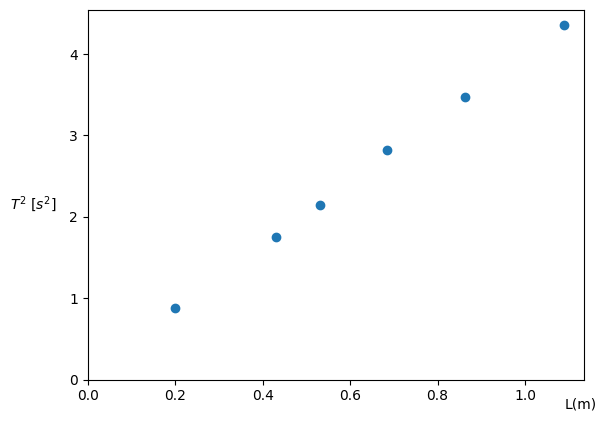

In [9]:
#T^2 su L
# Creare un DataFrame con pandas
data = {r'L[cm]': L, r'T^2 [s^2]': T_interpol_media}
df = pd.DataFrame(data)
display(HTML(df.to_html(escape=False)))

# Disegno il grafico con barre di errore
plt.errorbar(L,T_interpol_media2, yerr=T_interpol_ds, fmt='o', ls='none', label='data')
# abbellimenti
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.text(max(L), -0.1*(max(T_interpol_media2)-min(T_interpol_media2)+2*max(T_interpol_ds)), 'L(m)')
plt.text(-0.2*(max(L)-min(L)), max(T_interpol_media)+max(T_interpol_ds), '$T^2$ $[s^2]$')


,log(L) [cm],log(T) [s]
0,-1.609438,-0.061982
1,-0.843970,0.278767
2,-0.634878,0.380694
3,-0.378336,0.517841
4,-0.147920,0.623261
5,0.086178,0.735632


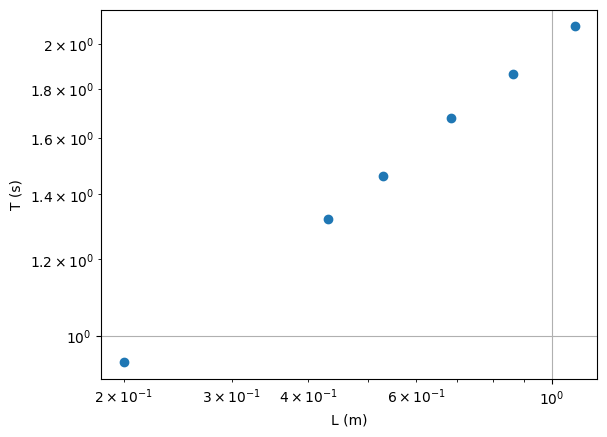

In [10]:
#Scala logaritmica
print("\n")
data = {'log(L) [cm]': L_log, 'log(T) [s]': T_media_log}
df = pd.DataFrame(data)
display(HTML(df.to_html(escape=False)))

fig, ax = plt.subplots()
ax.loglog(L, T_interpol_media, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L (m)')
ax.set_ylabel('T (s)')
ax.grid(True)
plt.savefig('log')
plt.show()

## **INTERPOLAZIONE**



(0.024873184341838803, 0.015317363015671655, 1.9835882638654325, 0.020490425909078264, 0.00031007765670633007)
y = (0.025 ± 0.015) +(1.984 ± 0.020)x 


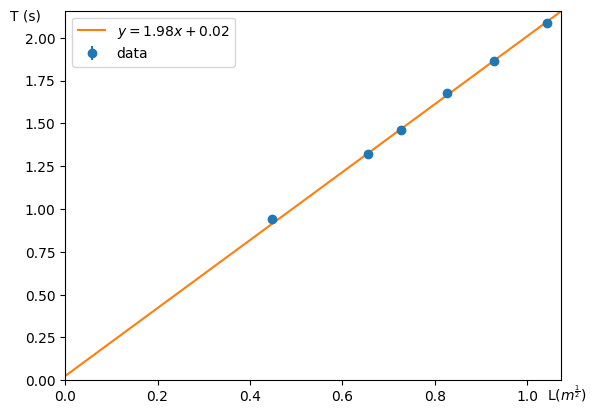

In [35]:
res = Interpolazionesyi(L_sqrt,T_interpol_media,T_interpol_ds)
print(res)
print('y = ({:.3f} ± {:.3f}) +({:.3f} ± {:.3f})x '.format(res[0],res[1],res[2],res[3]))

A = (res[0])
B = (res[2])
sb = (res[3])

# Definisco la funzione che voglio disegnare
def line(x,m,q):
  y = m * x + q
  return y

# Disegno il grafico con barre di errore
plt.errorbar(L_sqrt,T_interpol_media, yerr=T_interpol_ds, fmt='o', ls='none', label='data')
# abbellimenti
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.text(max(L_sqrt), -0.1*(max(T_interpol_media)-min(T_interpol_media)+2*max(T_interpol_ds)), r'L($m^\frac{1}{2}$)')
plt.text(-0.2*(max(L_sqrt)-min(L_sqrt)), max(T_interpol_media)+max(T_interpol_ds), 'T (s)')

# Disegno la funzione
xmin, xmax = 0, max(L_sqrt)+0.1*(max(L_sqrt)-min(L_sqrt))
t = np.linspace(xmin,xmax) # questa funzione definisce un vettore ad alta densità per calcolare la funzione da disegnare lungo l'asse x
plt.plot(t,line(t,B,A),label=r"$y = {:.2f}x + {:.2f}  $".format(B,A))
plt.legend() # aggiungo una legenda


In [36]:
def chisq(y,e,sy):
    '''
    y: vettore delle misure
    e: vettore dei valori attesi per i valori di x considerati
    sy: incertezza sulle misure
    '''
    if len(y)!=len(e) or len(y) == 0:
        print('I dati inseriti non sono validi')
        return 0
    if sy ==0 :
        print('L\'incertezza non può essere 0')
        return 0
    c2 = 0
    for i in range(len(y)): c2 = c2 + (y[i]-e[i])*(y[i]-e[i])
    c2 /= sy[i]*sy[i]
    return c2

print(A)
chi2v = chisq(T_interpol_media,line(L_sqrt,B, A),T_interpol_ds)
print('chi2 = {:.2f}'.format(chi2v))

d = len(T_interpol_media)-2 #A e B
pchi2 = 1-chi2.cdf(chi2v,d)
print('P(chi2) = {:.1f}%'.format(100.*pchi2))

0.024873184341838803
chi2 = 6.33
P(chi2) = 17.6%


## **VALORE DI g**

In [69]:
#Modo 1
def g1(T):
  g = ((0.20)*((2*np.pi)**2)) / (T**2 )
  return g

def sigma_g1(g,T,st):
  sigma_g = g*2*st/T
  return sigma_g

g_1 = g1(media(T20)/10)
sigma_g1 = sigma_g1(g_1, media(T20)/10, deviazione_standard(T20)/10)
print('g_1 = ({:.3f} ± {:.3f}) ms^-2'.format(g_1,sigma_g1))

#Modo 2
def g2(B):
  g = ((2*np.pi)**2) / (B*B)
  return g

def sg_2(g, y, sy):
  sg = 2*(g / y) * sy
  return sg

g_2 = g2(B)
sigma_g2 = sg_2(g2(B) ,B, sb)
print('g_2 = ({:.3f} ± {:.3f}) ms^-2'.format(g2(B),sigma_g2))

g_1 = (8.938 ± 0.255) ms^-2
g_2 = (10.034 ± 0.207) ms^-2


In [74]:
#test di compatibilità

t = (g_2-g_1) /(np.sqrt(sigma_g2**2+sigma_g1**2))
print(t)

g_atteso = 9.81
t1 = (g_atteso-g_1)/sigma_g1
print("t1 = {}".format(t1))
def gaussian_g1(x): return gaus(x, g_atteso, sigma_g1)

test_compatibilità_1, _ = quad(gaussian_g1, g_atteso-t1*sigma_g1, g_atteso+t1*sigma_g1)
print("Compatibilità1 = {}".format(test_compatibilità_1))

t2 = (g_2 -g_atteso)/sigma_g2
print("t2 = {}".format(t2))
def gaussian_g2(x): return gaus(x, g_atteso, sigma_g2)

test_compatibilità_2, _ = quad(gaussian_g2, g_atteso-t2*sigma_g2, g_atteso+t2*sigma_g2)
print("Compatibilità2 = {}".format(test_compatibilità_2))

3.33594008394257
t1 = 3.422784308848945
Compatibilità1 = 0.9993801676018529
t2 = 1.078650815875948
Compatibilità2 = 0.7192565809415645


## **CORREZIONI**

In [52]:
#Approssimazione di piccole oscillazioni
def Periodo(l):
    P = [2*np.pi*np.sqrt(i / 9.81) for i in l]
    return P

periodo = Periodo(L)


def Piccole_oscillazioni(y,z):
  Po = y*(1+((z*z)/16))
  numero_di_cifre = 3
  Poo = np.round(Po, numero_di_cifre)
  return Poo

theta = [ (1/36), (1/ 18), (1/ 12), (1/ 9), (5/36), (1/6) ]
# Crea un dizionario per mappare i valori decimali alle loro corrispondenti frazioni
theta_dict = {(1/36): "π/36", (1/18): "π/18", (1/12): "π/12", (1/9): "π/9", (5/36): "5π/36", (1/6): "π/6"}

table_dict = {}

for i in range(len(L)):
  for j in range(len(theta)):
    # Calcola il periodo atteso
    Po = Piccole_oscillazioni(periodo[i],theta[j]*np.pi)
    # Arrotonda alla terza cifra decimale
    Po = np.round(Po, 3)
    # Aggiungi il risultato al dizionario della tabella
    if L[i] not in table_dict:
      table_dict[L[i]] = {}
    table_dict[L[i]][theta_dict[theta[j]]] = Po

# Crea un DataFrame da table_dict
df = pd.DataFrame(table_dict)
df.index = pd.MultiIndex.from_product([['Theta[Rad]'], df.index])
print('                                L[m]')
display(HTML(df.to_html(escape=False)))

print("\n")

#Approssimazione di massa puntiforme
def Periodo_atteso(l, r):
  T = 2*np.pi*np.sqrt((l*l + ((0.4*r*r) )) / (9.81 *l))
  numero_di_cifre = 3
  Tm = np.round(T, numero_di_cifre)
  return Tm

print("Questi sono i valori considerando il pendolo non come un punto uniforme:")
for i in L:
  print("Con l = {} m, il periodo atteso è di {} s".format(i, (Periodo_atteso(i, Diametro / 2))))



{0.2: {'π/36': 0.898, 'π/18': 0.899, 'π/12': 0.901, 'π/9': 0.904, '5π/36': 0.908, 'π/6': 0.913}, 0.43: {'π/36': 1.316, 'π/18': 1.318, 'π/12': 1.321, 'π/9': 1.325, '5π/36': 1.331, 'π/6': 1.338}, 0.53: {'π/36': 1.461, 'π/18': 1.463, 'π/12': 1.467, 'π/9': 1.472, '5π/36': 1.478, 'π/6': 1.485}, 0.685: {'π/36': 1.661, 'π/18': 1.663, 'π/12': 1.667, 'π/9': 1.673, '5π/36': 1.68, 'π/6': 1.689}, 0.8625: {'π/36': 1.864, 'π/18': 1.867, 'π/12': 1.871, 'π/9': 1.877, '5π/36': 1.885, 'π/6': 1.895}, 1.09: {'π/36': 2.095, 'π/18': 2.098, 'π/12': 2.103, 'π/9': 2.11, '5π/36': 2.119, 'π/6': 2.13}}
                                L[m]




Questi sono i valori considerando il pendolo non come un punto uniforme:
Con l = 0.2 m, il periodo atteso è di 0.898 s
Con l = 0.43 m, il periodo atteso è di 1.316 s
Con l = 0.53 m, il periodo atteso è di 1.461 s
Con l = 0.685 m, il periodo atteso è di 1.66 s
Con l = 0.8625 m, il periodo atteso è di 1.863 s
Con l = 1.09 m, il periodo atteso è di 2.094 s
